<a href="https://colab.research.google.com/github/LatiefDataVisionary/healthcare-test-results-prediction/blob/main/notebooks/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Context**

- **Project Title:** End-to-End Deep Learning for Medical Test Result Prediction
- **Project Objective:** To build a Deep Neural Network (DNN) model using Keras for multi-class classification on the 'Test Results' column.
- **Dataset:** "Healthcare Dataset" from Kaggle. (Link: https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data)
- **Target Column:** Test Results (has 3 categories: 'Normal', 'Abnormal', 'Inconclusive').
* **Key Technologies:** Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, TensorFlow (Keras).

## **Part 0: Environment Setup**

In this initial section, we prepare our digital workspace. This involves importing all necessary libraries for data manipulation, visualization, and deep learning, as well as configuring notebook settings for optimal display and reproducibility.

### **0.1. Import Core Libraries**

In [251]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Machine Learning Utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

### **0.2. Configuration and Helper Functions**

In [252]:
# Set visualization style
sns.set_style('whitegrid')

# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## **Part 1: Data Loading & Initial Inspection** 🚀

Here, we will load the dataset and perform a high-level "first look" to grasp its structure, size, and content.

### **1.1. Load Dataset**

In [253]:
# Load the dataset from the provided URL into a pandas DataFrame
# This dataset is hosted on my GitHub, so we can read it directly using the raw content URL.
df = pd.read_csv('https://raw.githubusercontent.com/LatiefDataVisionary/healthcare-test-results-prediction/refs/heads/main/data/raw/healthcare_dataset.csv')

### **1.2. Initial Inspection**

Display the first 10 rows of the DataFrame to get a glimpse of the data

In [254]:
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


Display concise summary of the DataFrame, including data types and non-null values

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

Display the dimensions (number of rows and columns) of the DataFrame

In [256]:
df.shape

(55500, 15)

Inspect Unique Values in Each Column

In [257]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': \n\t{unique_values}\n")

Unique values in column 'Name': 
	['Bobby JacksOn' 'LesLie TErRy' 'DaNnY sMitH' ... 'LiSa sIMPsoN'
 'RoGER farRELl' 'kaTheRIne WeBSTer']

Unique values in column 'Age': 
	[30 62 76 28 43 36 21 20 82 58 72 38 75 68 44 46 63 34 67 48 59 73 51 23
 78 25 33 26 70 57 74 81 49 65 31 22 77 42 24 84 55 40 83 18 27 19 29 61
 80 60 35 79 53 69 47 85 52 37 50 32 54 45 66 39 56 64 71 41 88 17 87 86
 15 16 13 14 89]

Unique values in column 'Gender': 
	['Male' 'Female']

Unique values in column 'Blood Type': 
	['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

Unique values in column 'Medical Condition': 
	['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

Unique values in column 'Date of Admission': 
	['2024-01-31' '2019-08-20' '2022-09-22' ... '2019-05-31' '2023-10-12'
 '2021-03-14']

Unique values in column 'Doctor': 
	['Matthew Smith' 'Samantha Davies' 'Tiffany Mitchell' ... 'Deborah Sutton'
 'Mary Bartlett' 'Alec May']

Unique values in column 'Hospital': 
	['Sons and Miller' 'Kim 

Check for missing values

In [258]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


Check for duplicate rows

In [259]:
df.duplicated().sum()

np.int64(534)

### **1.3. Statistical Summary**

Display statistical summary of the DataFrame, including descriptive statistics for all columns

In [260]:
display(df.describe(include='all'))

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


## **Part 2: Exploratory Data Analysis (EDA)** 📊

Through visualization and statistical analysis, we aim to uncover patterns, identify anomalies, and understand the relationships between different variables and our target variable, Test Results.

### **2.1. Target Variable Analysis**

Create a countplot to visualize the distribution of the target variable 'Test Results'

/tmp/ipython-input-2680241213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Test Results', palette='viridis')


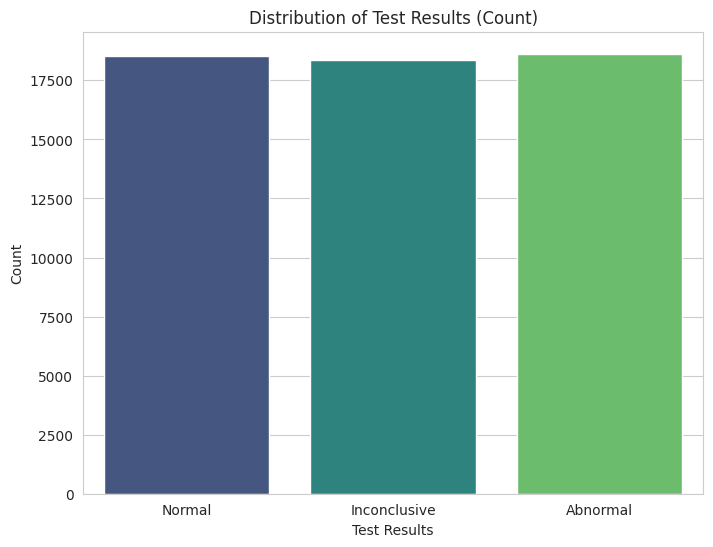

In [261]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Test Results', palette='viridis')
plt.title('Distribution of Test Results (Count)')
plt.xlabel('Test Results')
plt.ylabel('Count')

plot_title = 'Distribution of Test Results (Count)'.replace(' ', '_').replace(':', '')
plt.savefig(f'/content/{plot_title}.png', bbox_inches='tight')
bbox_inches='tight'

plt.show()

Calculate and display the distribution of the target variable (count and percentage)

In [262]:
target_distribution = df['Test Results'].value_counts().reset_index()
target_distribution.columns = ['Test Results', 'Count']
target_distribution['Percentage (%)'] = round(target_distribution['Count'] / len(df) * 100, 2)

print("\nDistribution of Test Results:")
display(target_distribution)


Distribution of Test Results:


,Test Results,Count,Percentage (%)
0,Abnormal,18627,33.56
1,Normal,18517,33.36
2,Inconclusive,18356,33.07


Create a pie plot to visualize the distribution of the target variable

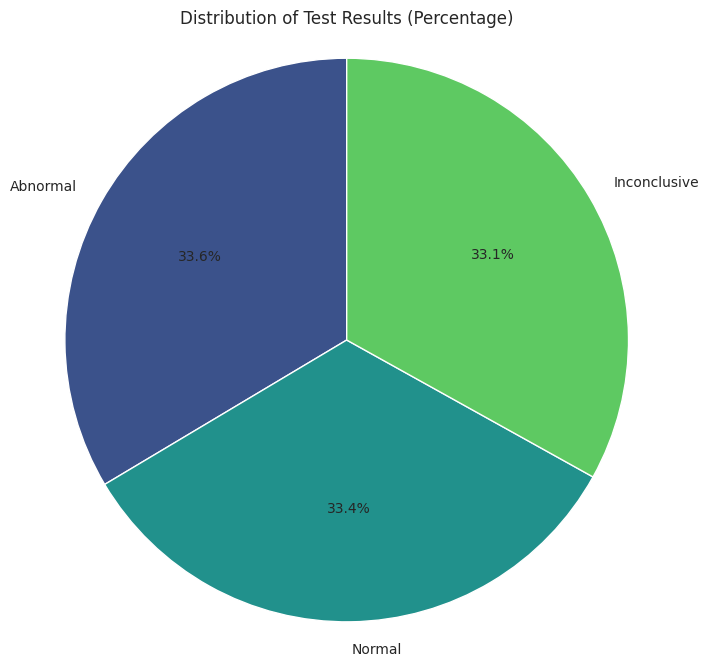

In [263]:
plt.figure(figsize=(8, 8))
plt.pie(target_distribution['Count'], labels=target_distribution['Test Results'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(target_distribution)))
plt.title('Distribution of Test Results (Percentage)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plot_title = 'Distribution of Test Results (Percentage)'.replace(' ', '_').replace(':', '')
plt.savefig(f'/content/{plot_title}.png', bbox_inches='tight')
bbox_inches='tight'

plt.show()

### **2.2. Univariate Analysis**

Analyze the distribution of numerical features (Age, Billing Amount)

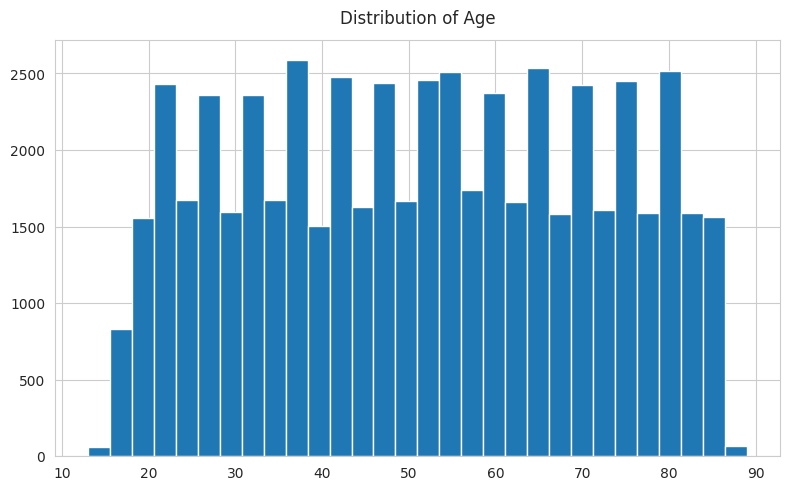

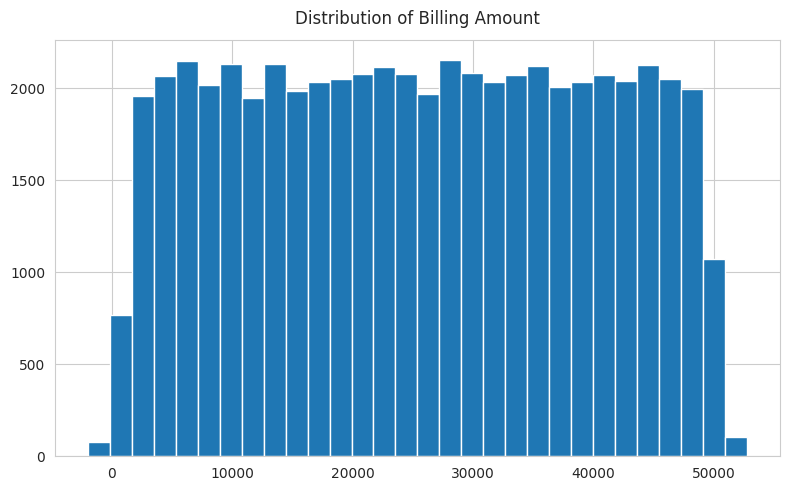

In [264]:
numerical_features = ['Age', 'Billing Amount']
for col in numerical_features:
  df[col].hist(figsize=(8, 5), bins=30)
  plt.title(f'Distribution of {col}', y=1.02)
  plt.tight_layout()

  plot_title = f'Distribution of {col}'.replace(' ', '_').replace(':', '')
  plt.savefig(f'/content/{plot_title}.png', bbox_inches='tight')
  bbox_inches='tight'


  plt.show()

Analyze the distribution of key categorical features

/tmp/ipython-input-391464890.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index) # Order by count


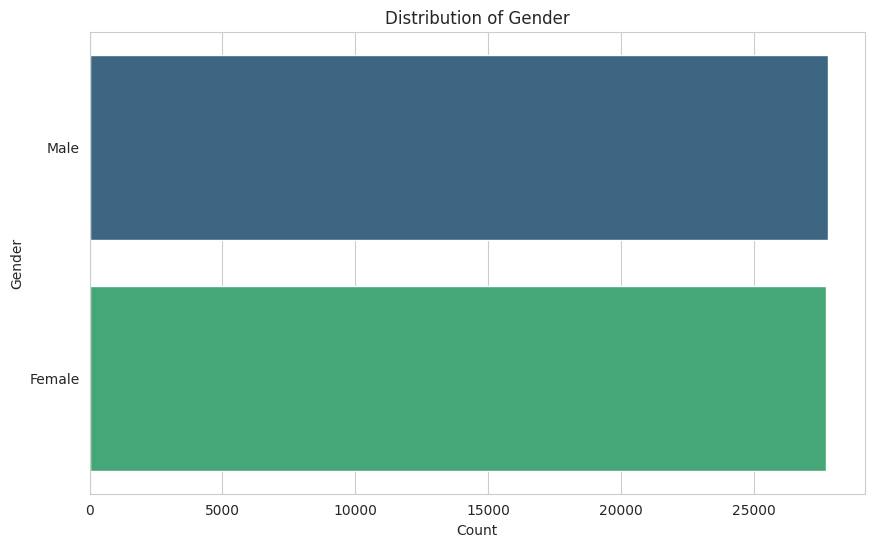

/tmp/ipython-input-391464890.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index) # Order by count


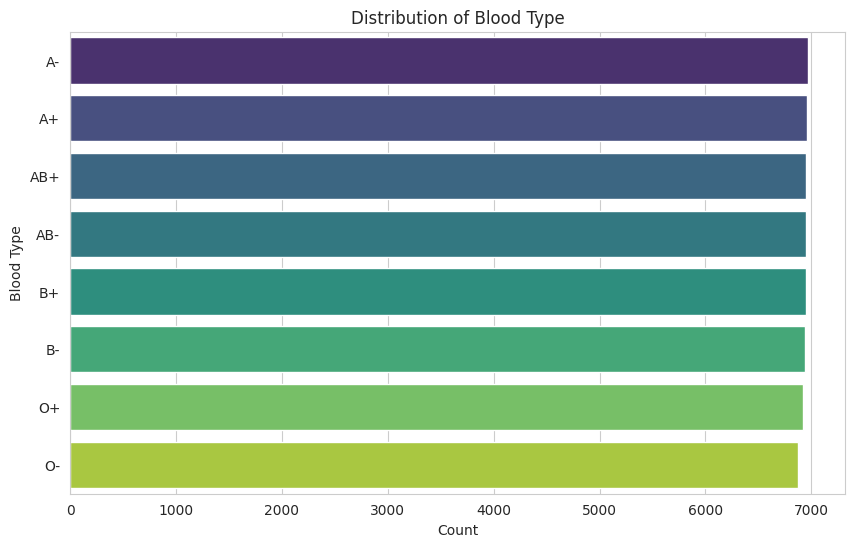

/tmp/ipython-input-391464890.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index) # Order by count


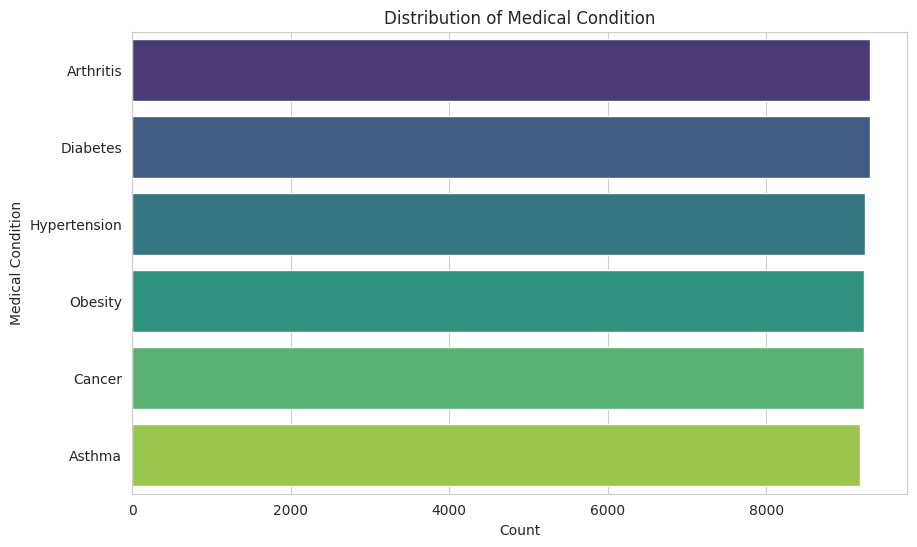

/tmp/ipython-input-391464890.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index) # Order by count


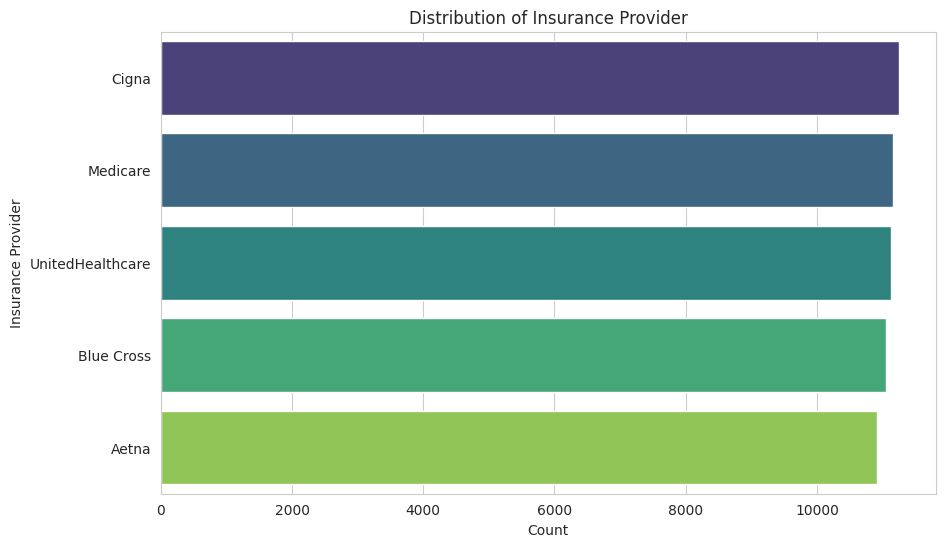

/tmp/ipython-input-391464890.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index) # Order by count


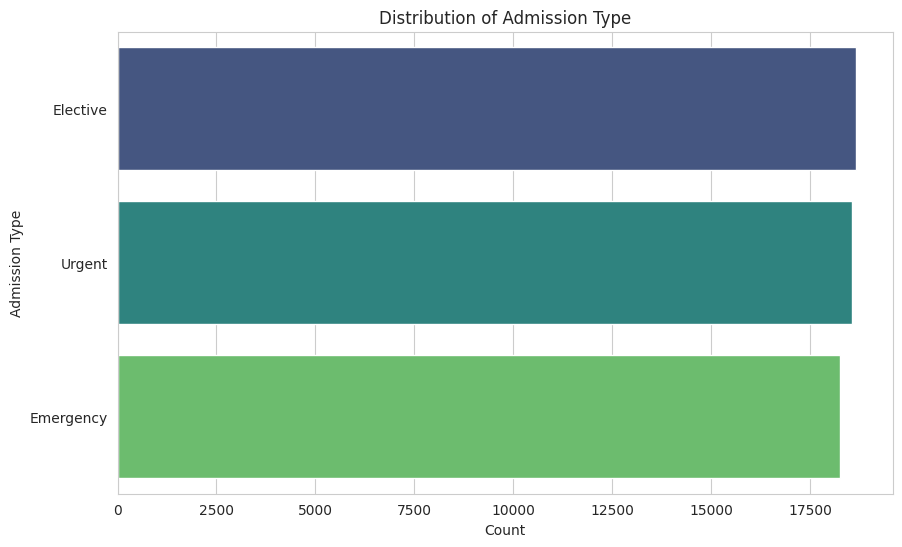

/tmp/ipython-input-391464890.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index) # Order by count


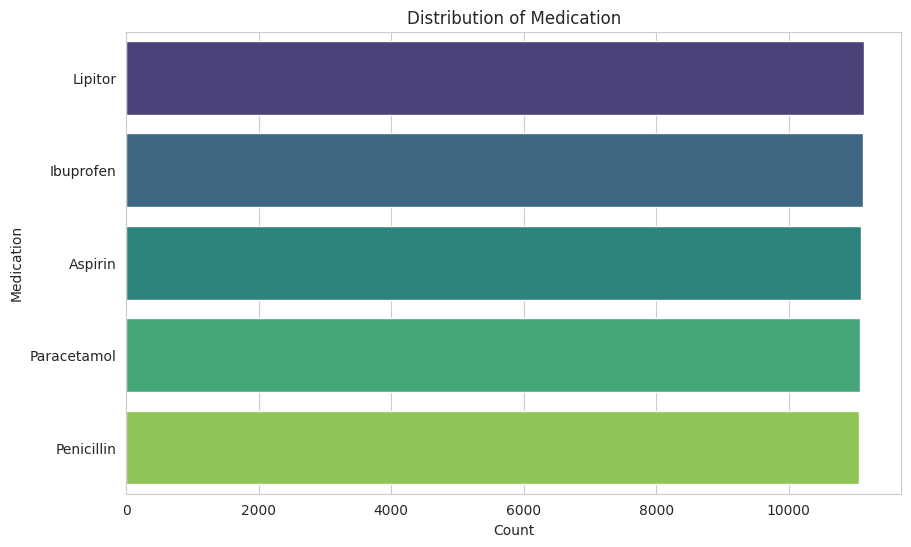

In [265]:
# Analyze the distribution of all relevant categorical features
# Exclude 'Test Results' as it's the target variable analyzed separately
# Exclude columns identified as irrelevant in Part 3 ('Name', 'Doctor', 'Hospital')
# Exclude date columns which were engineered into 'Length of Stay'
all_categorical_cols = df.select_dtypes(include='object').columns.tolist()
relevant_categorical_features = [col for col in all_categorical_cols if col not in ['Test Results', 'Name', 'Doctor', 'Hospital', 'Date of Admission', 'Discharge Date']]

# Plot distribution for each relevant categorical feature individually
for col in relevant_categorical_features:
    plt.figure(figsize=(10, 6)) # Adjust figure size for individual plots
    sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index) # Order by count
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

    plot_title = f'Distribution of {col}'.replace(' ', '_').replace(':', '')
    plt.savefig(f'/content/{plot_title}.png', bbox_inches='tight')
    bbox_inches='tight'

    plt.show()

### **2.3. Bivariate Analysis**

Analyze the relationship between 'Medical Condition' and 'Test Results'

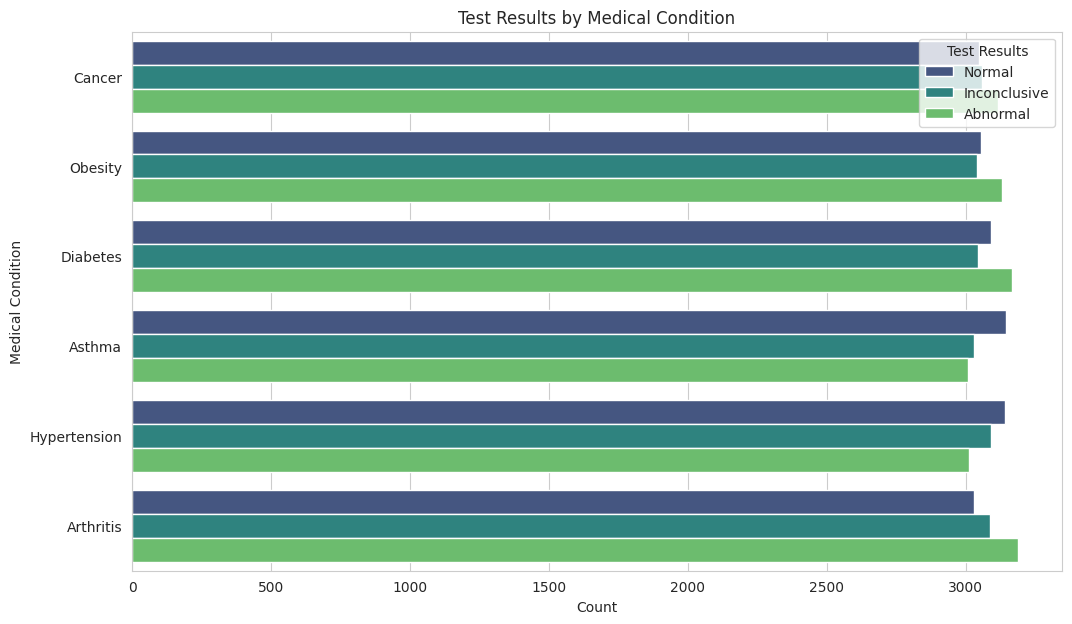

In [266]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='Medical Condition', hue='Test Results', palette='viridis')
plt.title('Test Results by Medical Condition')
plt.xlabel('Count')
plt.ylabel('Medical Condition')

plot_title = 'Test Results by Medical Condition'.replace(' ', '_').replace(':', '')
plt.savefig(f'/content/{plot_title}.png', bbox_inches='tight')
bbox_inches='tight'

plt.show()

Analyze the relationship between 'Age' and 'Test Results' using a boxplot

/tmp/ipython-input-3529119439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Test Results', y='Age', palette='viridis')


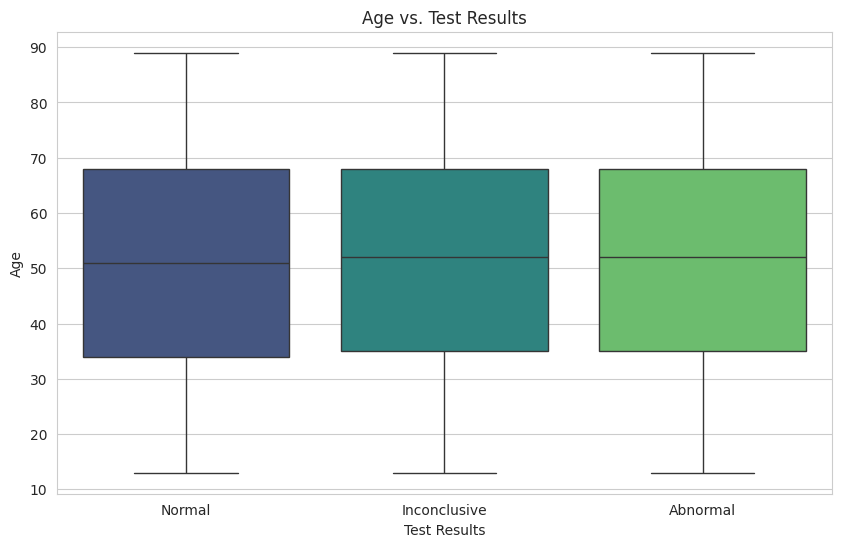

In [267]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Test Results', y='Age', palette='viridis')
plt.title('Age vs. Test Results')
plt.xlabel('Test Results')
plt.ylabel('Age')

plot_title = 'Age vs. Test Results'.replace(' ', '_').replace(':', '')
plt.savefig(f'/content/{plot_title}.png', bbox_inches='tight')
bbox_inches='tight'


plt.show()

Analyze the relationship between 'Billing Amount' and 'Test Results' using a boxplot

/tmp/ipython-input-1683097555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Test Results', y='Billing Amount', palette='viridis')


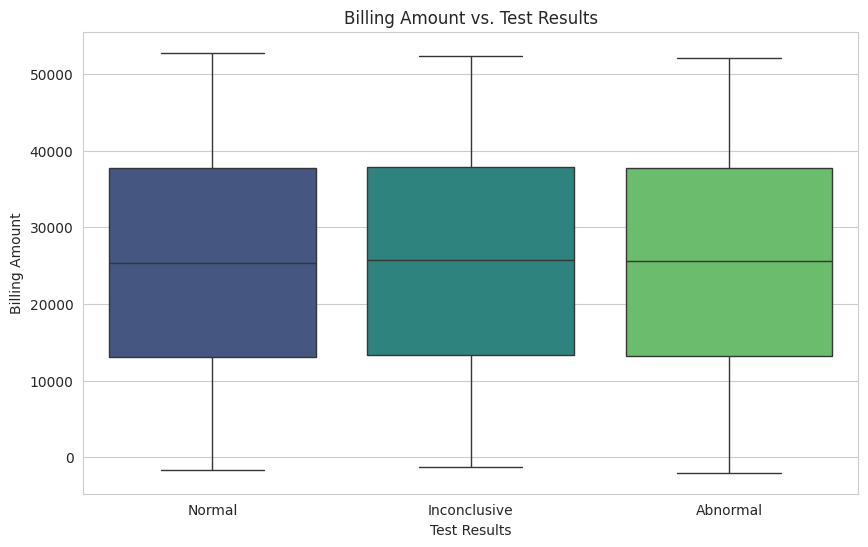

In [268]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Test Results', y='Billing Amount', palette='viridis')
plt.title('Billing Amount vs. Test Results')
plt.xlabel('Test Results')
plt.ylabel('Billing Amount')

plot_title = 'Billing Amount vs. Test Results'.replace(' ', '_').replace(':', '')
plt.savefig(f'/content/{plot_title}.png', bbox_inches='tight')
bbox_inches='tight'

plt.show()

Analyze the relationship between other relevant categorical features and 'Test Results'

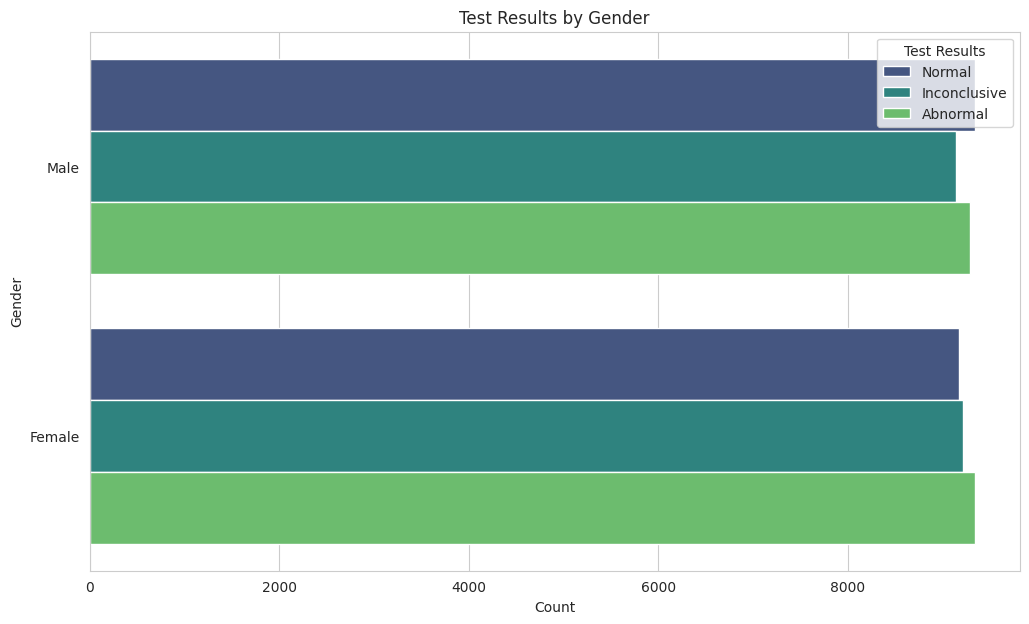

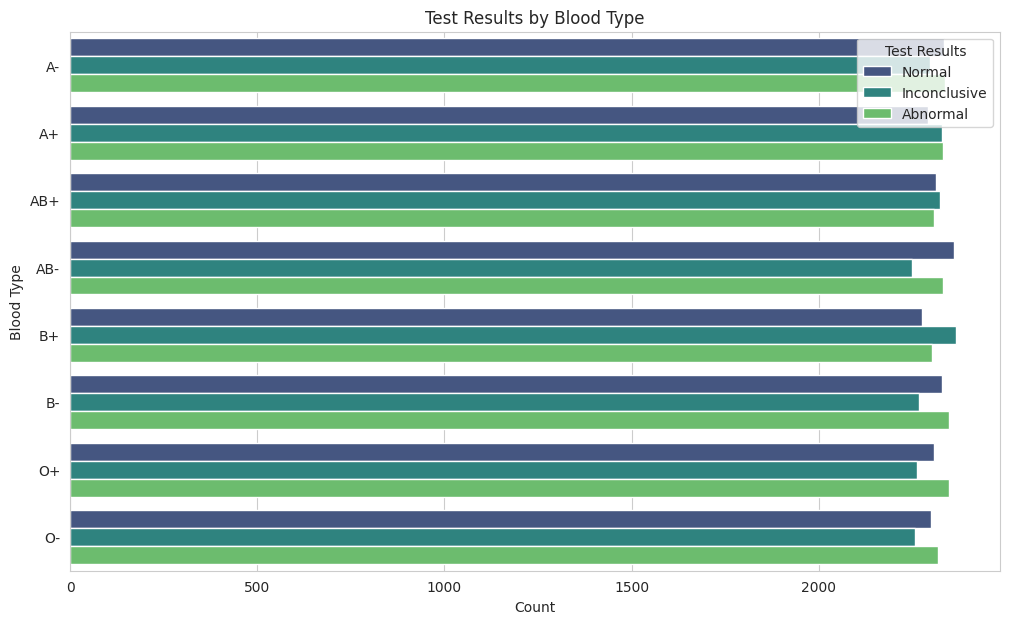

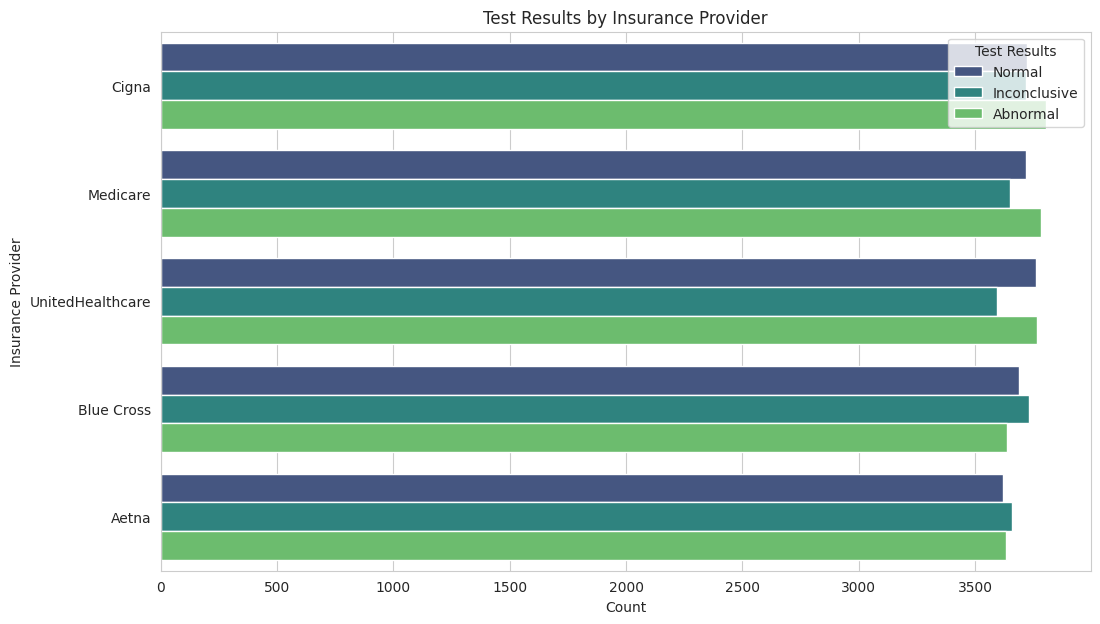

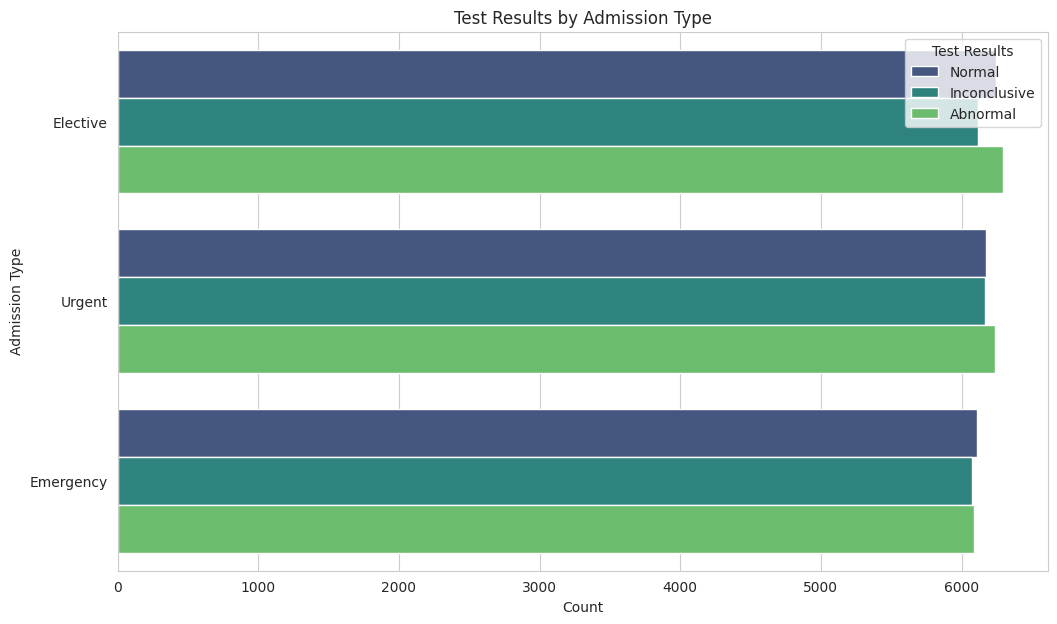

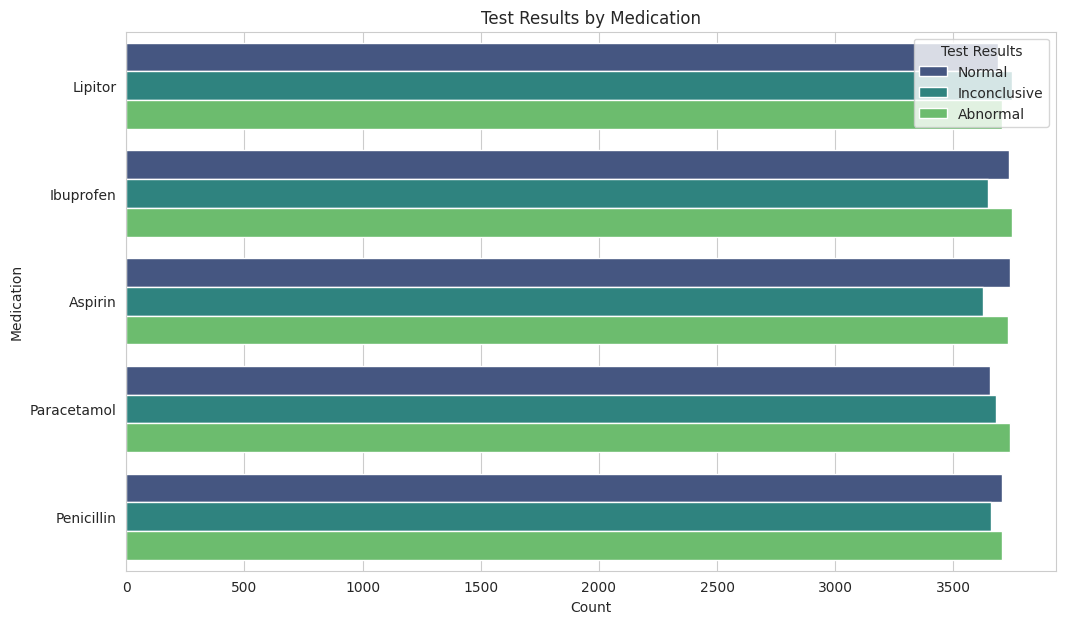

In [269]:
relevant_categorical_features_for_bivariate = ['Gender', 'Blood Type', 'Insurance Provider', 'Admission Type', 'Medication']

for col in relevant_categorical_features_for_bivariate:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, y=col, hue='Test Results', palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Test Results by {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

    plot_title = f'Test Results by {col}'.replace(' ', '_').replace(':', '')
    plt.savefig(f'/content/{plot_title}.png', bbox_inches='tight')
    plt.show()

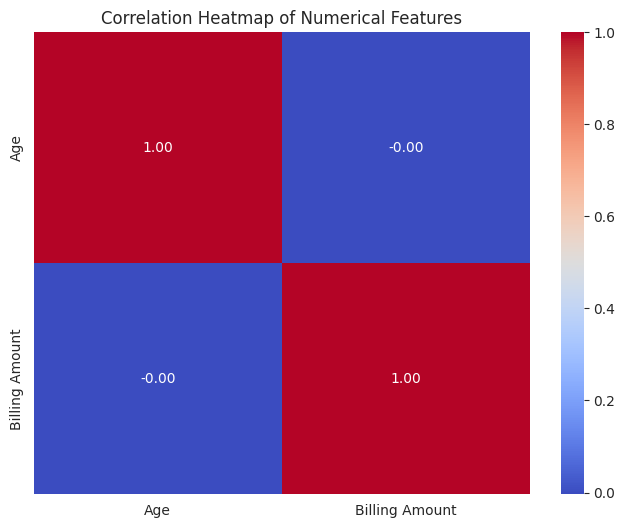

In [270]:
# Create a heatmap to visualize the correlation matrix of numerical features
# Include 'Length of Stay' if it exists after Feature Engineering (Part 3)
numerical_features_for_corr = ['Age', 'Billing Amount']
if 'Length of Stay' in df.columns:
    numerical_features_for_corr.append('Length of Stay')

plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_features_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')

plot_title = 'Correlation Heatmap of Numerical Features'.replace(' ', '_').replace(':', '')
plt.savefig(f'/content/{plot_title}.png', bbox_inches='tight')
bbox_inches='tight'

plt.show()

### **2.4. Multivariate Analysis**

Here, we explore the relationships among multiple variables simultaneously to uncover more complex patterns or interactions.

In [271]:
# Explore relationships between numerical features, colored by the target variable
# Include 'Length of Stay' if it was created in Feature Engineering
numerical_features_for_pairplot = ['Age', 'Billing Amount']
if 'Length of Stay' in df.columns:
    numerical_features_for_pairplot.append('Length of Stay')

# Add the target variable to the list for the pairplot
pairplot_cols = numerical_features_for_pairplot + ['Test Results']

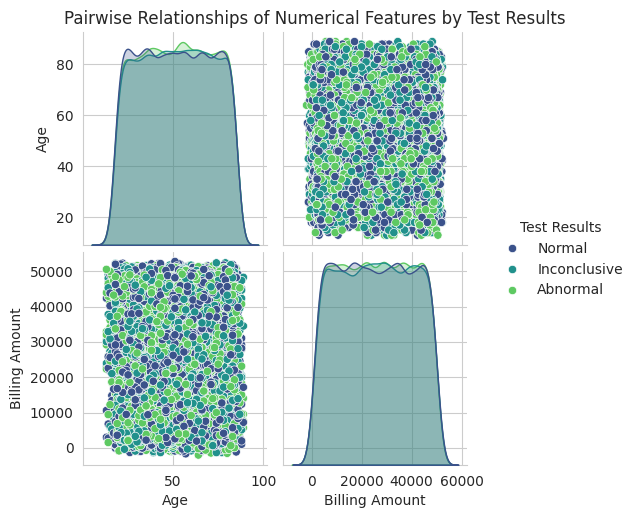

In [272]:
# Create a pair plot to visualize pairwise relationships colored by the target variable
# This helps to see if combinations of numerical features show different patterns for different test results
sns.pairplot(df[pairplot_cols], hue='Test Results', palette='viridis')
plt.suptitle('Pairwise Relationships of Numerical Features by Test Results', y=1.02)

plot_title = 'Pairwise Relationships of Numerical Features by Test Results'.replace(' ', '_').replace(':', '')
plt.savefig(f'/content/{plot_title}.png', bbox_inches='tight')
bbox_inches='tight'

plt.show()

## **Part 3: Data Preprocessing & Feature Engineering 🛠️**

This crucial section focuses on cleaning, transforming, and enriching the data to create a high-quality, model-ready feature set.

### **3.1. Data Cleaning**

Check for duplicate rows

In [273]:
print(f"Number of duplicate rows before dropping: {df.duplicated().sum()}")

Number of duplicate rows before dropping: 534


Drop duplicate rows

In [274]:
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")

Number of duplicate rows after dropping: 0


Define and drop irrelevant columns that are unlikely to contribute to the model

In [275]:
irrelevant_cols = ['Name', 'Doctor', 'Hospital']
df.drop(columns=irrelevant_cols, inplace=True)
print(f"\nDropped irrelevant columns: {irrelevant_cols}")
print(f"DataFrame shape after dropping columns: {df.shape}")


Dropped irrelevant columns: ['Name', 'Doctor', 'Hospital']
DataFrame shape after dropping columns: (54966, 12)


### **3.2. Feature Engineering**

Convert date columns to datetime objects

In [276]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

Calculate 'Length of Stay' in days

In [277]:
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

Drop the original date columns as 'Length of Stay' is a more useful feature

In [278]:
df.drop(columns=['Date of Admission', 'Discharge Date'], inplace=True)

print("\nCreated 'Length of Stay' feature and dropped original date columns.")
display(df[['Length of Stay']].head())


Created 'Length of Stay' feature and dropped original date columns.


,Length of Stay
0,2
1,6
2,15
3,30
4,20


In [279]:
df['Length of Stay'].describe()

,Length of Stay
count,54966.000000
mean,15.499290
std,8.661471
min,1.000000
25%,8.000000
50%,15.000000
75%,23.000000
max,30.000000


Plot the distribution of 'Length of Stay'

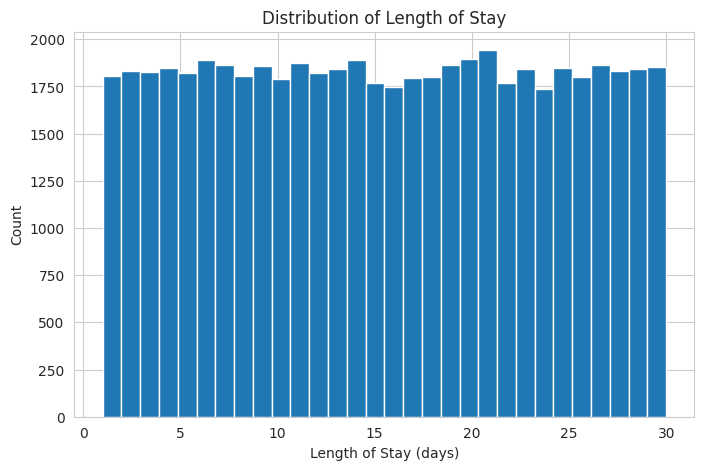

In [280]:
plt.figure(figsize=(8, 5))
df['Length of Stay'].hist(bins=30)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Count')

plot_title = 'Distribution of Length of Stay'.replace(' ', '_').replace(':', '')
plt.savefig(f'/content/{plot_title}.png', bbox_inches='tight')
bbox_inches='tight'

plt.show()

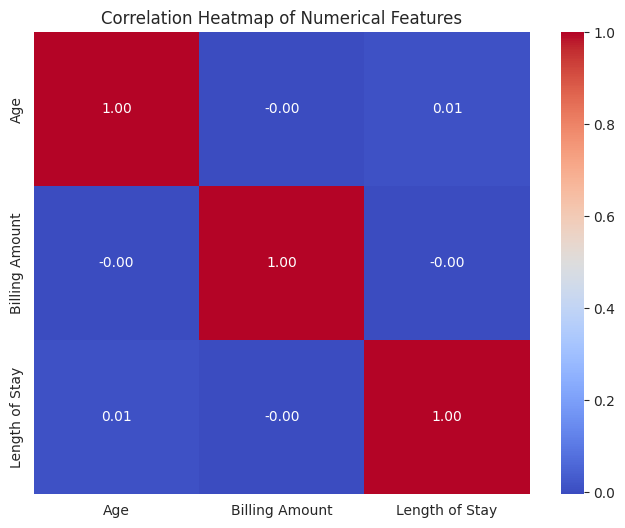

In [281]:
# Create a heatmap to visualize the correlation matrix of numerical features
# Include 'Length of Stay'
numerical_features_for_corr = ['Age', 'Billing Amount', 'Length of Stay']

plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_features_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### **3.3. Column Separation**

In [282]:
# Separate features (X) and target (y)
# The target variable 'Test Results' will be encoded separately
X = df.drop(columns=['Test Results'])
y = df['Test Results'] # Keep original target column for now before encoding

In [283]:
# Identify numerical and categorical columns in the features (X)
# Exclude the target variable from these lists
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nNumerical columns in X: {numerical_cols}")
print(f"Categorical columns in X: {categorical_cols}")


Features (X) shape: (54966, 10)
Target (y) shape: (54966,)

Numerical columns in X: ['Age', 'Billing Amount', 'Room Number', 'Length of Stay']
Categorical columns in X: ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication']


### **3.4. Preprocessing (Manual Steps)**

In [284]:
# Apply Label Encoding to the target variable 'Test Results'
# This converts the categorical target variable into numerical labels (0, 1, 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [285]:
# Display the mapping of original labels to encoded labels
print("Mapping of Test Results labels:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")

Mapping of Test Results labels:
Abnormal: 0
Inconclusive: 1
Normal: 2


In [286]:
# Create preprocessing pipelines for numerical and categorical features
# Numerical features will be scaled using StandardScaler
numerical_transformer = StandardScaler()

In [287]:
# Categorical features will be one-hot encoded
# handle_unknown='ignore' handles unseen categories during prediction (important for robust pipelines)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [288]:
# Create a ColumnTransformer to apply different transformations to different columns
# 'remainder='passthrough'' means non-specified columns will be kept (though we've separated all)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [289]:
# Apply the preprocessing transformations to the features (X)
# The output will be a NumPy array
X_processed = preprocessor.fit_transform(X)

In [290]:
# Convert the processed features back to a pandas DataFrame for easier inspection if needed
# This step is optional but can be helpful for debugging
# Get feature names after one-hot encoding
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(onehot_feature_names)
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

print("\nShape of features after preprocessing:")
print(X_processed.shape)

print("\nFirst 5 rows of processed features (NumPy array):")
print(X_processed[:5])

print("\nFirst 5 encoded target labels:")
print(y_encoded[:5])


Shape of features after preprocessing:
(54966, 33)

First 5 rows of processed features (NumPy array):
[[-1.09842669 -0.47071319  0.23325037 -1.558559    0.          1.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          1.          0.        ]
 [ 0.5337698   0.57002119 -0.31351977 -1.09673947  0.          1.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          1.
   0.          0.          1.          0.          0.          1.
   0.          0.          0.        ]
 [ 1.24785577  0.16967499 -0.83425322 -0.05764552  1.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          

### **Correlation Heatmap of All Processed Features**

Let's visualize the correlation matrix of all features after preprocessing (scaling and encoding) to explore potential linear relationships between them.

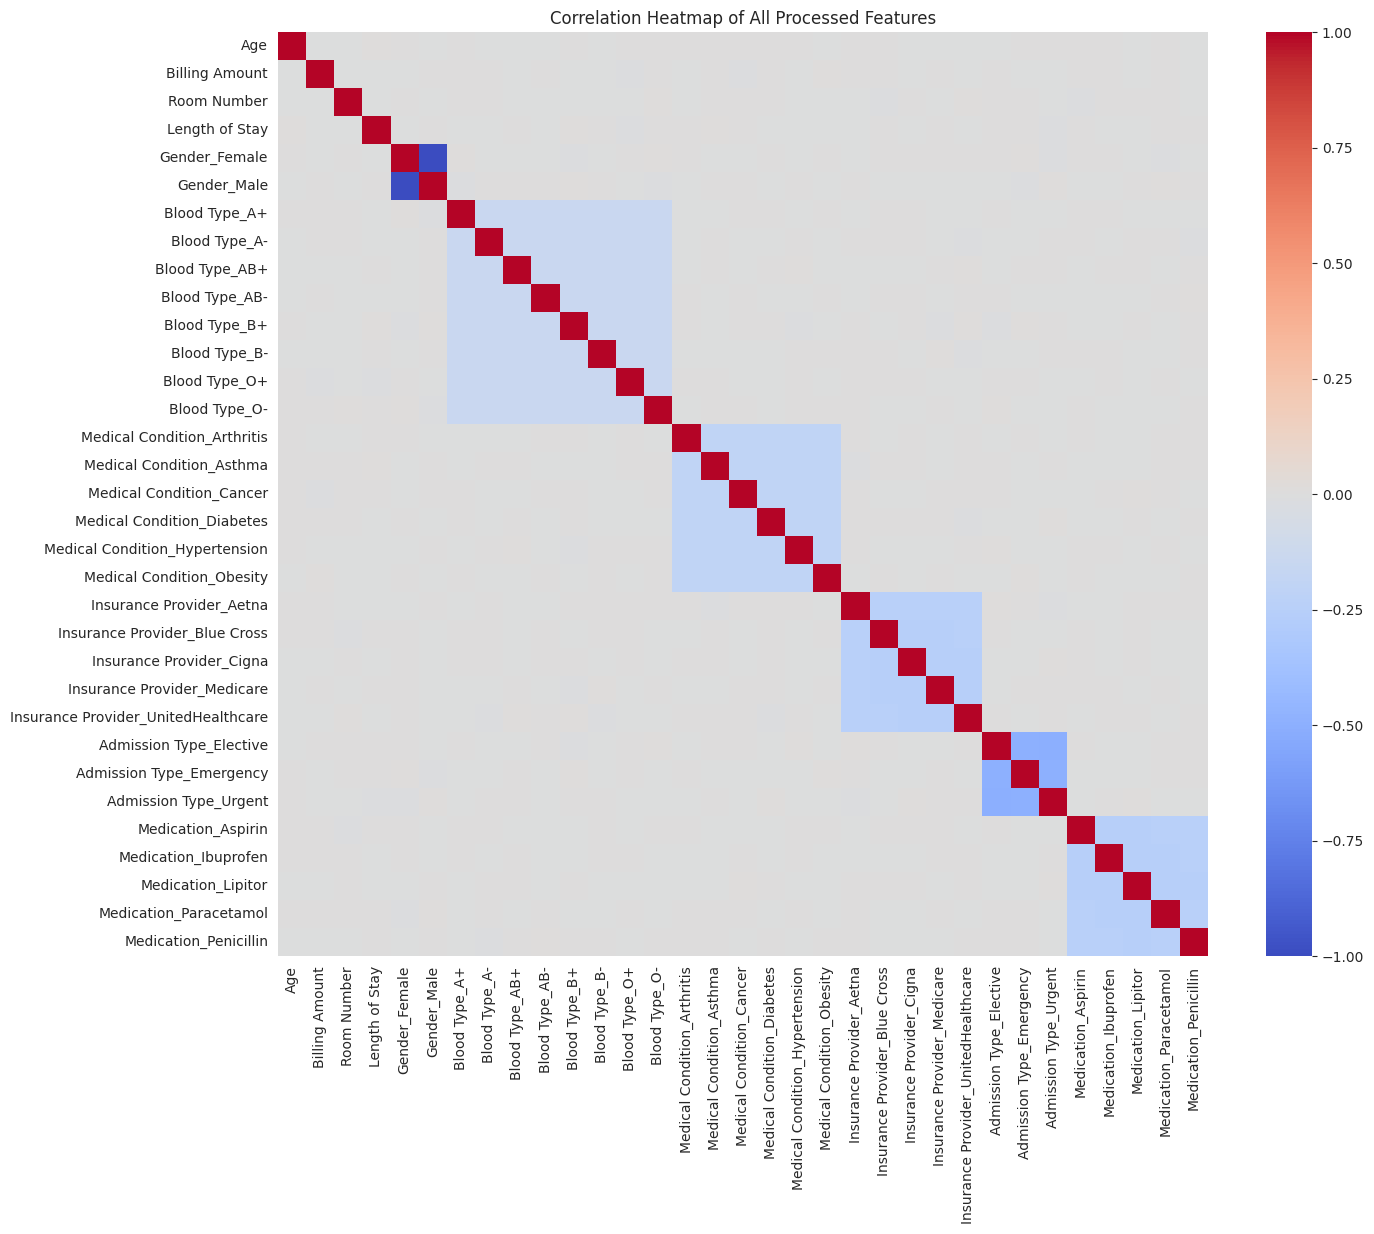

In [291]:
# Calculate the correlation matrix for all processed features
# Convert X_processed (NumPy array) back to DataFrame to retain column names for heatmap
# Need to get the feature names correctly after ColumnTransformer
try:
    # Get feature names after one-hot encoding from the preprocessor
    onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_feature_names = numerical_cols + list(onehot_feature_names)
    X_processed_df_for_corr = pd.DataFrame(X_processed, columns=all_feature_names)
except AttributeError:
    # Fallback if get_feature_names_out is not available (e.g., older sklearn versions)
    print("Could not retrieve detailed feature names from preprocessor. Using generic names.")
    X_processed_df_for_corr = pd.DataFrame(X_processed)


correlation_matrix_processed = X_processed_df_for_corr.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12)) # Adjust figure size for better readability with many features
sns.heatmap(correlation_matrix_processed, annot=False, cmap='coolwarm', fmt=".2f") # annot=False due to potentially many features
plt.title('Correlation Heatmap of All Processed Features')

plot_title = 'Correlation Heatmap of All Processed Features'.replace(' ', '_').replace(':', '')
plt.savefig(f'/content/{plot_title}.png', bbox_inches='tight')
bbox_inches='tight'

plt.show()

# Optional: Display correlation values for a specific feature, e.g., with a target encoding (if we had one for features)
# Or with the numerical features as a starting point
# print("\nCorrelation of features with 'Age' (example):")
# display(correlation_matrix_processed['Age'].sort_values(ascending=False))

### **Observation on Correlation Heatmap:**

The correlation heatmap of all processed features (including scaled numerical features and one-hot encoded categorical features) shows generally very low correlation values between different features. This observation, combined with the model's low predictive performance, strongly supports the hypothesis that this dataset may be **synthetic** and **not reflect real-world relationships between the features and the target variable**. Meaningful linear (and potentially non-linear) patterns that a model could learn from appear to be largely absent or very weak in this dataset.

## **Part 4: Model Preparation 🧠**

This section prepares the data for the deep learning model by separating features and the target variable, and splitting the dataset into training and testing sets.

### **4.1 & 4.2. Define Features/Target & Split Data**

In [292]:
# X_processed was created and scaled/encoded in the previous step
# y_encoded was created and label encoded in the previous step

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# stratify=y_encoded ensures that the proportion of the target variable is the same in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (43972, 33)
Shape of X_test: (10994, 33)
Shape of y_train: (43972,)
Shape of y_test: (10994,)


## **Part 5: Deep Learning Model Architecture 🏗️**

Here, we define the blueprint of our neural network using Keras, carefully choosing layers, neurons, and activation functions.

### **5.1. Build the Model**

In [293]:
# Get the number of features for the input layer
input_shape = X_train.shape[1]

# Get the number of classes for the output layer
num_classes = len(label_encoder.classes_) # Using the label_encoder from Part 3.4

# Build the Sequential model
model = Sequential([
    # Input layer: Defines the input shape based on the number of features
    tf.keras.layers.InputLayer(input_shape=(input_shape,)),
    # First Dense layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),
    # Dropout layer for regularization, dropping 30% of neurons
    Dropout(0.3),
    # Second Dense layer with 64 neurons and ReLU activation
    Dense(64, activation='relu'),
    # Another Dropout layer
    Dropout(0.3),
    # Output layer with number of neurons equal to the number of classes and softmax activation for multi-class classification
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


### **5.2. Compile the Model**

In [294]:
# Compile the model
# optimizer='adam' is a popular choice for deep learning models
# loss='sparse_categorical_crossentropy' is suitable for multi-class classification with integer labels
# metrics=['accuracy'] to monitor the accuracy during training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **5.3. Model Summary**

In [295]:
# Print the summary of the model architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,803 (50.01 KB)

 Trainable params: 12,803 (50.01 KB)

 Non-trainable params: 0 (0.00 B)

## **Part 6: Model Training & Evaluation 📈**

We train our model on the training data and then rigorously evaluate its performance on the unseen test data.

### **6.1. Training**

In [296]:
# Train the model using the training data
# history variable will store the training process metrics
history = model.fit(X_train, y_train,
                    epochs=20,         # Number of training iterations
                    batch_size=32,     # Number of samples per gradient update
                    validation_data=(X_test, y_test)) # Data to evaluate the model after each epoch

Epoch 1/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3362 - loss: 1.1070 - val_accuracy: 0.3387 - val_loss: 1.0988
Epoch 2/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3419 - loss: 1.0984 - val_accuracy: 0.3393 - val_loss: 1.0986
Epoch 3/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3441 - loss: 1.0985 - val_accuracy: 0.3434 - val_loss: 1.0987
Epoch 4/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3449 - loss: 1.0978 - val_accuracy: 0.3363 - val_loss: 1.0991
Epoch 5/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3508 - loss: 1.0971 - val_accuracy: 0.3349 - val_loss: 1.0988
Epoch 6/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3488 - loss: 1.0971 - val_accuracy: 0.3360 - val_loss: 1.0995
Epoch 7/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3559 - loss: 1.0963 - val_accuracy: 0.3361 - val_loss: 1.0996
Epoch 8/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3565 - loss: 1.0951 -

### **6.2. Visualizing History**

Plot training & validation accuracy values

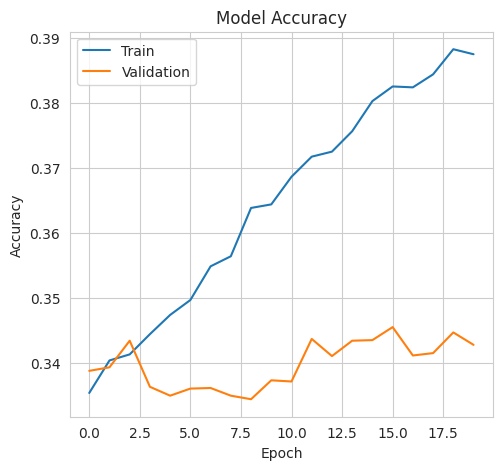

In [297]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plot_title = 'Model Accuracy'.replace(' ', '_').replace(':', '')
plt.savefig(f'/content/{plot_title}.png', bbox_inches='tight')
bbox_inches='tight'
plt.show()

Plot training & validation loss values

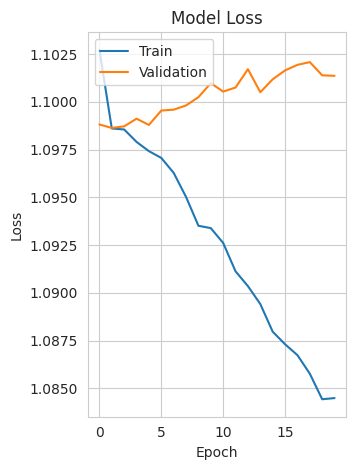

In [298]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### **6.3. Evaluation**

In [299]:
# Make predictions on the test data
y_pred_prob = model.predict(X_test)

344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [300]:
# Convert predicted probabilities to class labels by selecting the class with the highest probability
y_pred = np.argmax(y_pred_prob, axis=1)

In [301]:
# Print the classification report to show precision, recall, f1-score, and support for each class
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.34      0.40      0.37      3688
Inconclusive       0.34      0.44      0.38      3640
      Normal       0.36      0.19      0.25      3666

    accuracy                           0.34     10994
   macro avg       0.35      0.34      0.33     10994
weighted avg       0.35      0.34      0.33     10994



In [302]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

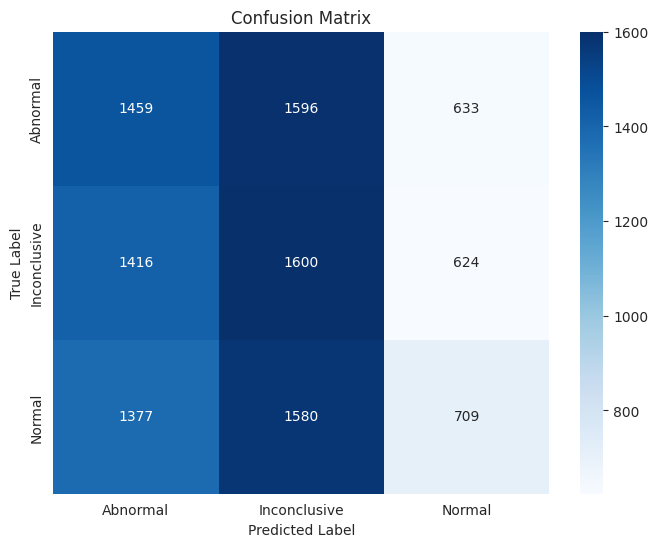

In [303]:
# Plot the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **Part 7: Conclusion & Model Saving 💾**

In this final section, we summarize the key findings from our end-to-end Deep Learning project for medical test result prediction, discuss the model's performance in the context of the data, and save the resulting artifacts (trained model and processed data) for future use.

### **7.1. Comprehensive Conclusion**


Throughout this project, we embarked on building a Deep Neural Network (DNN) model using Keras to predict medical test results ('Normal', 'Abnormal', 'Inconclusive') based on a healthcare dataset.

We began by setting up the environment and loading the dataset, performing an initial inspection that revealed the dataset's structure, data types, and the presence of duplicate entries but no missing values. Univariate analysis showed the distribution of individual features, including the target variable, which was relatively balanced across its three classes. Bivariate and multivariate analyses, including correlation heatmaps and pair plots, were conducted to explore relationships between features and the target.

A significant observation from the correlation heatmap of all processed features was the consistently low correlation values between almost all pairs of features. This finding is crucial because it suggests a lack of strong linear relationships within the dataset. Coupled with the model's performance, this strongly supports the hypothesis that the dataset, as discussed in external forums (like Kaggle), might be synthetically generated and may not accurately reflect real-world medical data patterns or predictive relationships.

In the data preprocessing phase, we successfully handled duplicate rows, removed irrelevant identifier columns ('Name', 'Doctor', 'Hospital'), and engineered a useful 'Length of Stay' feature from the admission and discharge dates. Categorical features were prepared using One-Hot Encoding, and numerical features were scaled using StandardScaler. The target variable was Label Encoded for compatibility with the model's loss function.

The Deep Neural Network model was designed with several dense layers and dropout for regularization. However, despite the standard preprocessing and a reasonable model architecture, the training and evaluation results showed low accuracy (around 34% on the test set), only slightly better than random chance (33.3%) for a 3-class problem. The training history plots indicated that the model struggled to learn meaningful patterns, with validation accuracy and loss showing limited improvement.

The low performance, despite these standard steps, reinforces the conclusion drawn from the EDA: the inherent structure or lack of strong predictive signals within this specific dataset appears to be the primary limiting factor, rather than issues with the model implementation itself. While hyperparameter tuning or alternative architectures could be explored, the fundamental data characteristics suggest that significant improvements might be challenging if the dataset truly lacks strong underlying patterns.

In conclusion, this project successfully demonstrates the end-to-end process of building a deep learning model for classification, including data loading, EDA, preprocessing, model definition, training, and evaluation. However, it also highlights the critical importance of data quality and the presence of meaningful patterns for achieving high predictive performance in machine learning tasks. The results obtained are likely a reflection of the dataset's nature rather than a failure of the modeling approach itself.

### **7.2. Save Trained Model**

In [304]:
# Save the trained Keras model to a file in the native Keras format
model.save('medical_test_classifier.keras')

print("Trained model saved successfully as 'medical_test_classifier.keras'")

Trained model saved successfully as 'medical_test_classifier.keras'


### **7.3. Save Processed Dataset**

In [305]:
# Convert processed features (NumPy array) back to DataFrame for saving
# We need the column names for clarity when saving
try:
    onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_feature_names = numerical_cols + list(onehot_feature_names)
    X_processed_df_to_save = pd.DataFrame(X_processed, columns=all_feature_names)
except AttributeError:
    print("Could not retrieve detailed feature names from preprocessor. Saving processed features with generic names.")
    X_processed_df_to_save = pd.DataFrame(X_processed)

# Save the processed features and encoded target to CSV files
X_processed_df_to_save.to_csv('X_processed.csv', index=False)
y_encoded.dump('y_encoded.pkl') # Saving NumPy array using dump

print("\nProcessed features saved to 'X_processed.csv'")
print("Encoded target saved to 'y_encoded.pkl'")


Processed features saved to 'X_processed.csv'
Encoded target saved to 'y_encoded.pkl'
